In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df= pd.read_csv(r'C:\Users\fnafisa\WORKSPACE\kaggle\data\PIORECRUSDM.csv')
df.rename(columns={'PIORECRUSDM':"Price", "DATE":"Date"}, inplace=True)
# df= pd.read_excel(r'C:\Users\fnafisa\WORKSPACE\kaggle\data\price of one category of iron ore.xlsx')
# df.rename(columns={'price':"Price"}, inplace=True)

df['Time']= np.arange(len(df.index))
df.head()

,Date,Price,Time
0,1990-01-01,14.05,0
1,1990-02-01,14.05,1
2,1990-03-01,14.05,2
3,1990-04-01,14.05,3
4,1990-05-01,14.05,4


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12144\1603327673.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Time Plot for Iron Ore monthly prices')

c:\Users\fnafisa\WORKSPACE\kaggle\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


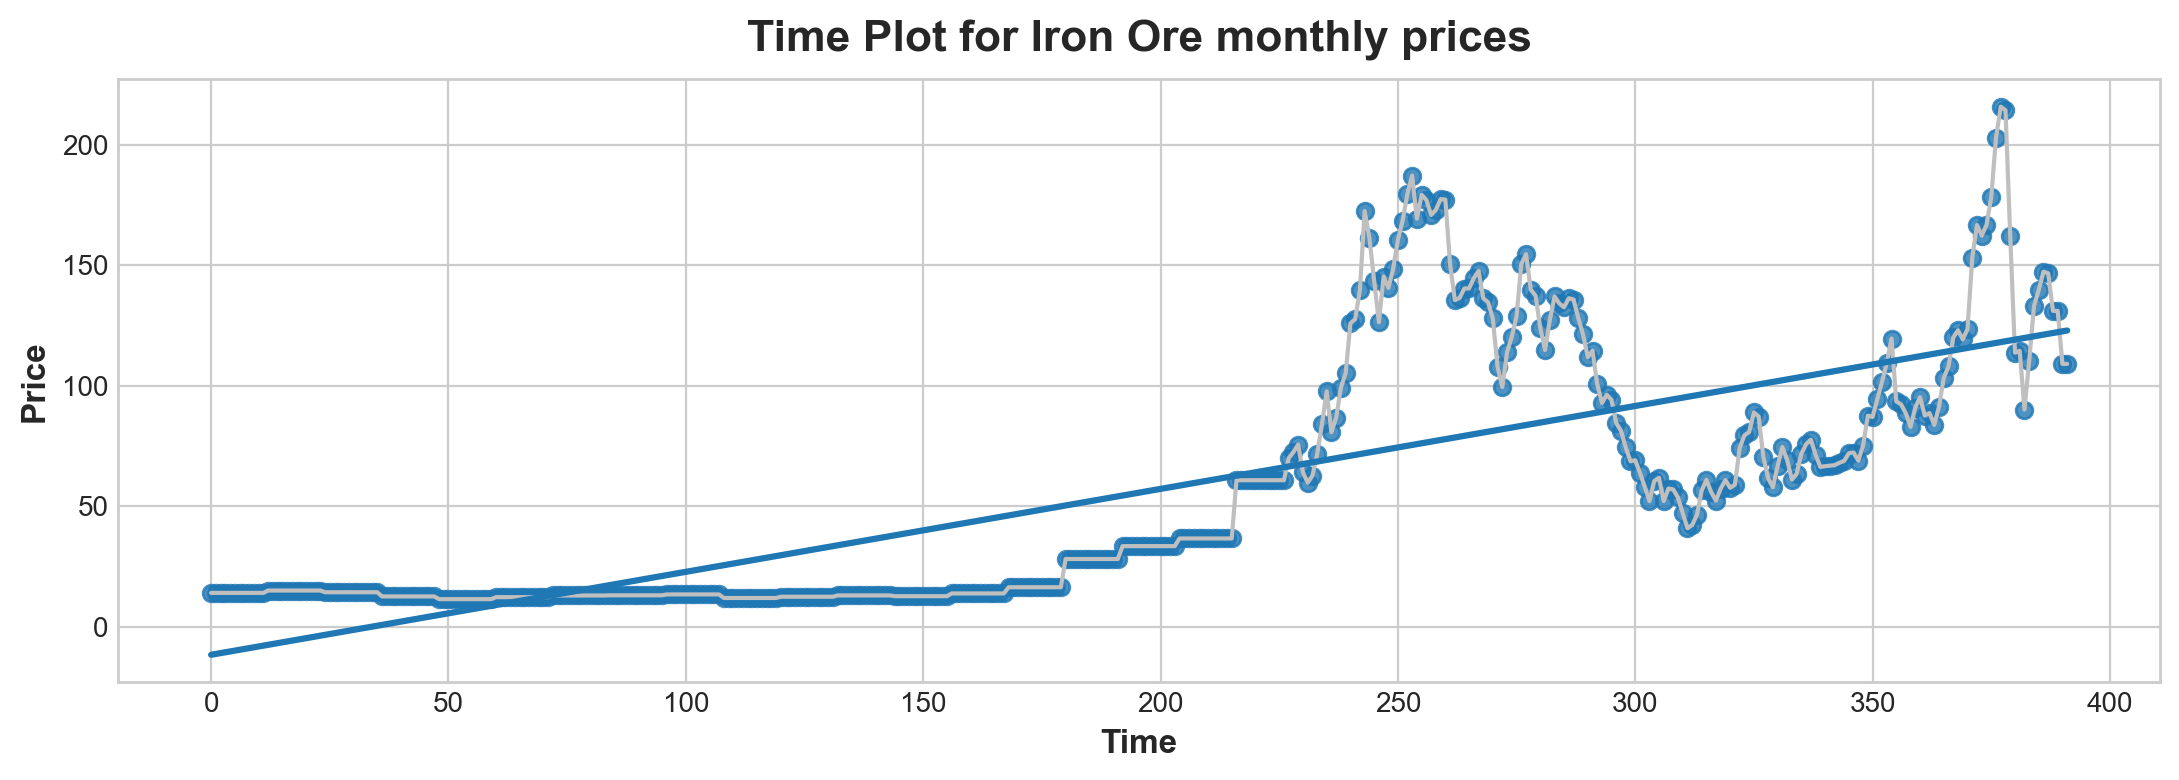

In [32]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout= True,
    figsize=(11,4),
    titlesize=18,
    titleweight= 'bold'
)
plt.rc(
    'axes',
    labelweight= 'bold',
    labelsize='large',
    titlesize=16,
    titlepad=10,
)

%config InlineBackend.figure_format = 'retina'

fig, ax= plt.subplots()
ax.plot('Time', 'Price', data=df, color= '0.75')
ax= sns.regplot(x='Time',y='Price',data=df,ci=None, scatter=dict(color='0.25'))
ax.set_title('Time Plot for Iron Ore monthly prices')

In [33]:
df

,Date,Price,Time
0,1990-01-01,14.050000,0
1,1990-02-01,14.050000,1
2,1990-03-01,14.050000,2
3,1990-04-01,14.050000,3
4,1990-05-01,14.050000,4
...,...,...,...
387,2022-04-01,146.666667,387
388,2022-05-01,131.090909,388
389,2022-06-01,131.045455,389
390,2022-07-01,109.047619,390


In [35]:
df['Lag_1'] = df['Price'].shift(1)
df = df.reindex(columns=['Price', 'Date', 'Lag_1'])

df

,Price,Date,Lag_1
0,14.050000,NaN,NaN
1,14.050000,NaN,14.050000
2,14.050000,NaN,14.050000
3,14.050000,NaN,14.050000
4,14.050000,NaN,14.050000
...,...,...,...
387,146.666667,NaN,147.347826
388,131.090909,NaN,146.666667
389,131.045455,NaN,131.090909
390,109.047619,NaN,131.045455


In [36]:

df= pd.read_csv(r'C:\Users\fnafisa\WORKSPACE\kaggle\data\PIORECRUSDM.csv')

df.rename(columns={'PIORECRUSDM':"PRICE"}, inplace=True)
df['Lag_1'] = df['PRICE'].shift(1)
df = df.reindex(columns=['PRICE', 'Lag_1'])


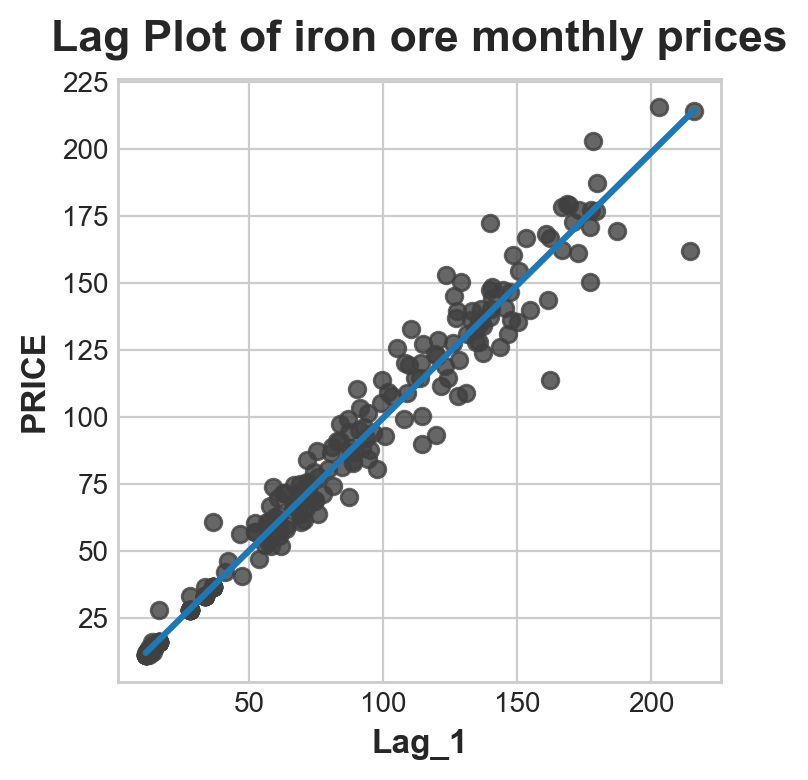

In [39]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='PRICE', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of iron ore monthly prices');

# Baseline model

In [62]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import plot_params

simplefilter('ignore')

# set matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout= True, figsize=(11,4))
plt.rc(
    'axes',
    labelweight='bold',
    labelsize= 'large',
    titleweight= 'bold',
    titlesize= 14,
    titlepad=10
)

plot_params= dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

%config InlineBackend.figure_format = 'retina'

# load iron ore dataset
df= pd.read_csv(r'C:\Users\fnafisa\WORKSPACE\kaggle\data\PIORECRUSDM.csv', parse_dates=['DATE'])
df= df.set_index("DATE")

In [63]:
df

,PIORECRUSDM
DATE,
1990-01-01,14.050000
1990-02-01,14.050000
1990-03-01,14.050000
1990-04-01,14.050000
1990-05-01,14.050000
...,...
2022-04-01,146.666667
2022-05-01,131.090909
2022-06-01,131.045455


In [64]:
df.to_period()

,PIORECRUSDM
DATE,
1990-01,14.050000
1990-02,14.050000
1990-03,14.050000
1990-04,14.050000
1990-05,14.050000
...,...
2022-04,146.666667
2022-05,131.090909
2022-06,131.045455


In [70]:
df= df.copy()
df['TIME']= np.arange(len(df.index))

df.head()

,PIORECRUSDM,TIME
DATE,,
1990-01-01,14.05,0
1990-02-01,14.05,1
1990-03-01,14.05,2
1990-04-01,14.05,3
1990-05-01,14.05,4


In [81]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# training 
X= df.loc[:,['TIME']]
y= df.loc[:,'PIORECRUSDM']

model_lr= LinearRegression()
model_xgb= XGBRegressor()

In [85]:
df = df.copy()

df['Time'] = np.arange(len(df.index))

In [86]:

# Training data
X = df.loc[:, ['TIME']]  # features
y = df.loc[:, 'PIORECRUSDM']  # target

In [87]:
X

,TIME
DATE,
1990-01-01,0
1990-02-01,1
1990-03-01,2
1990-04-01,3
1990-05-01,4
...,...
2022-04-01,387
2022-05-01,388
2022-06-01,389


In [90]:
model_lr = LinearRegression()
model_xgb = XGBRegressor()

model_lr.fit(X, y)
model_xgb.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [95]:
y_pred_lr = pd.Series(model_lr.predict(X), index=X.index)
y_pred_xgb = pd.Series(model_xgb.predict(X), index=X.index)


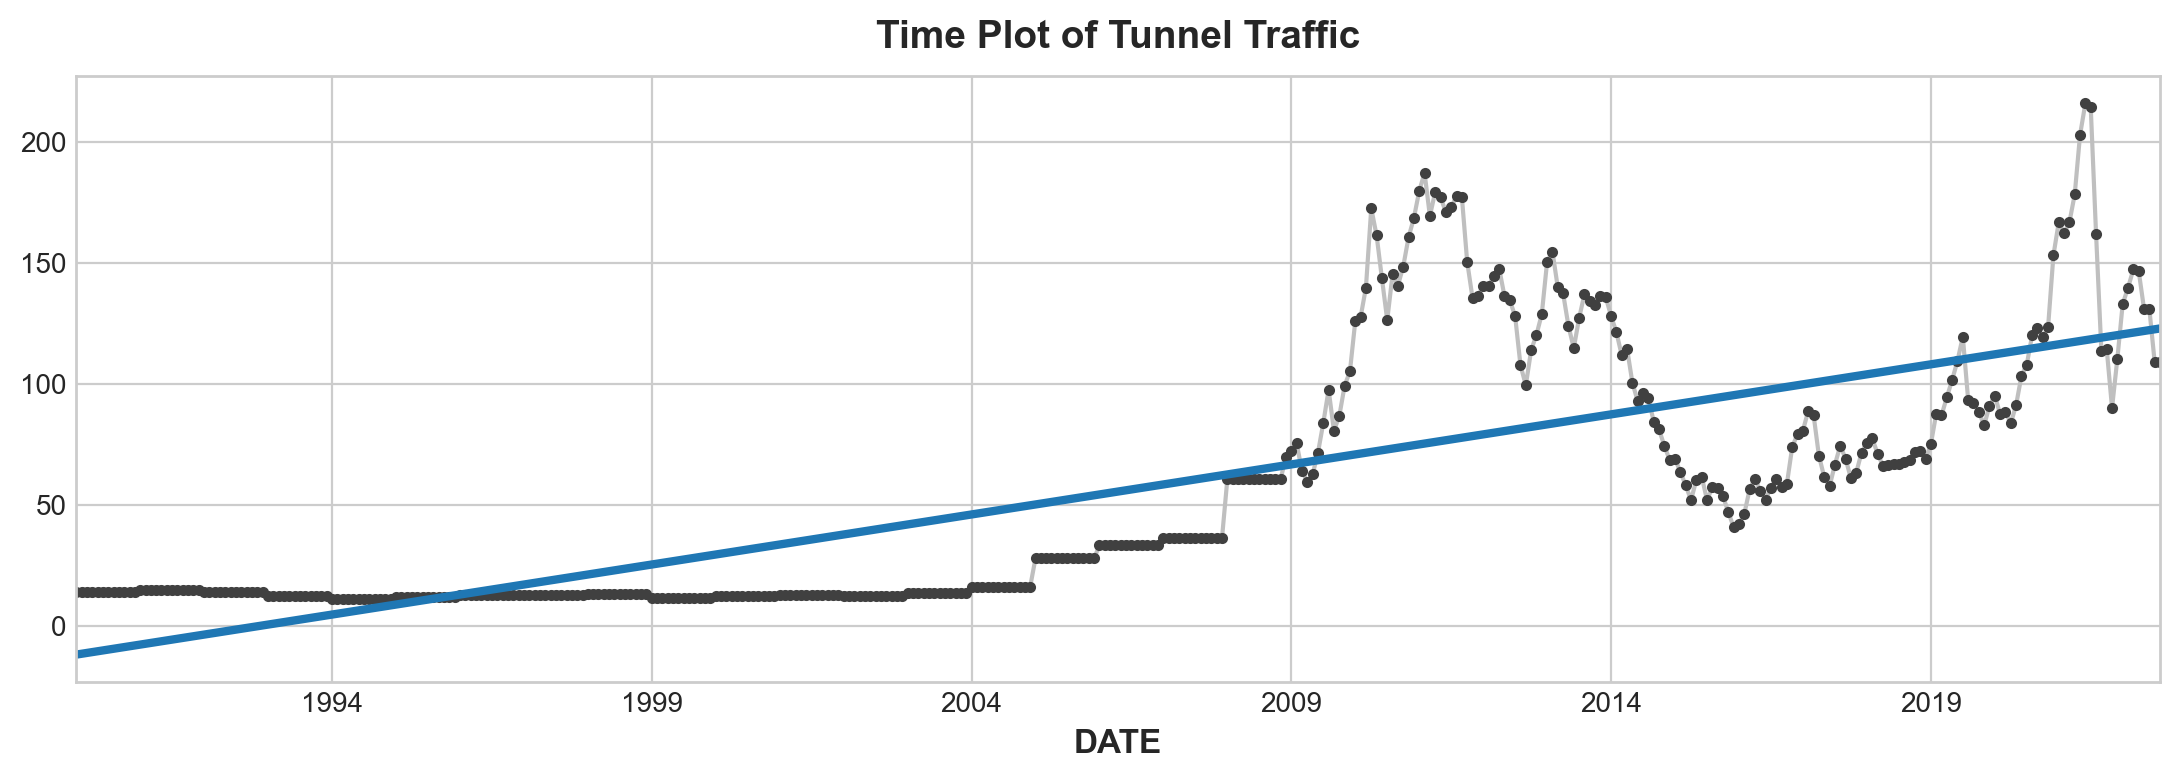

In [97]:
ax = y.plot(**plot_params)
ax = y_pred_lr.plot(ax=ax, linewidth=3)

ax.set_title('Time Plot of Iron Ore Monthly Prices');

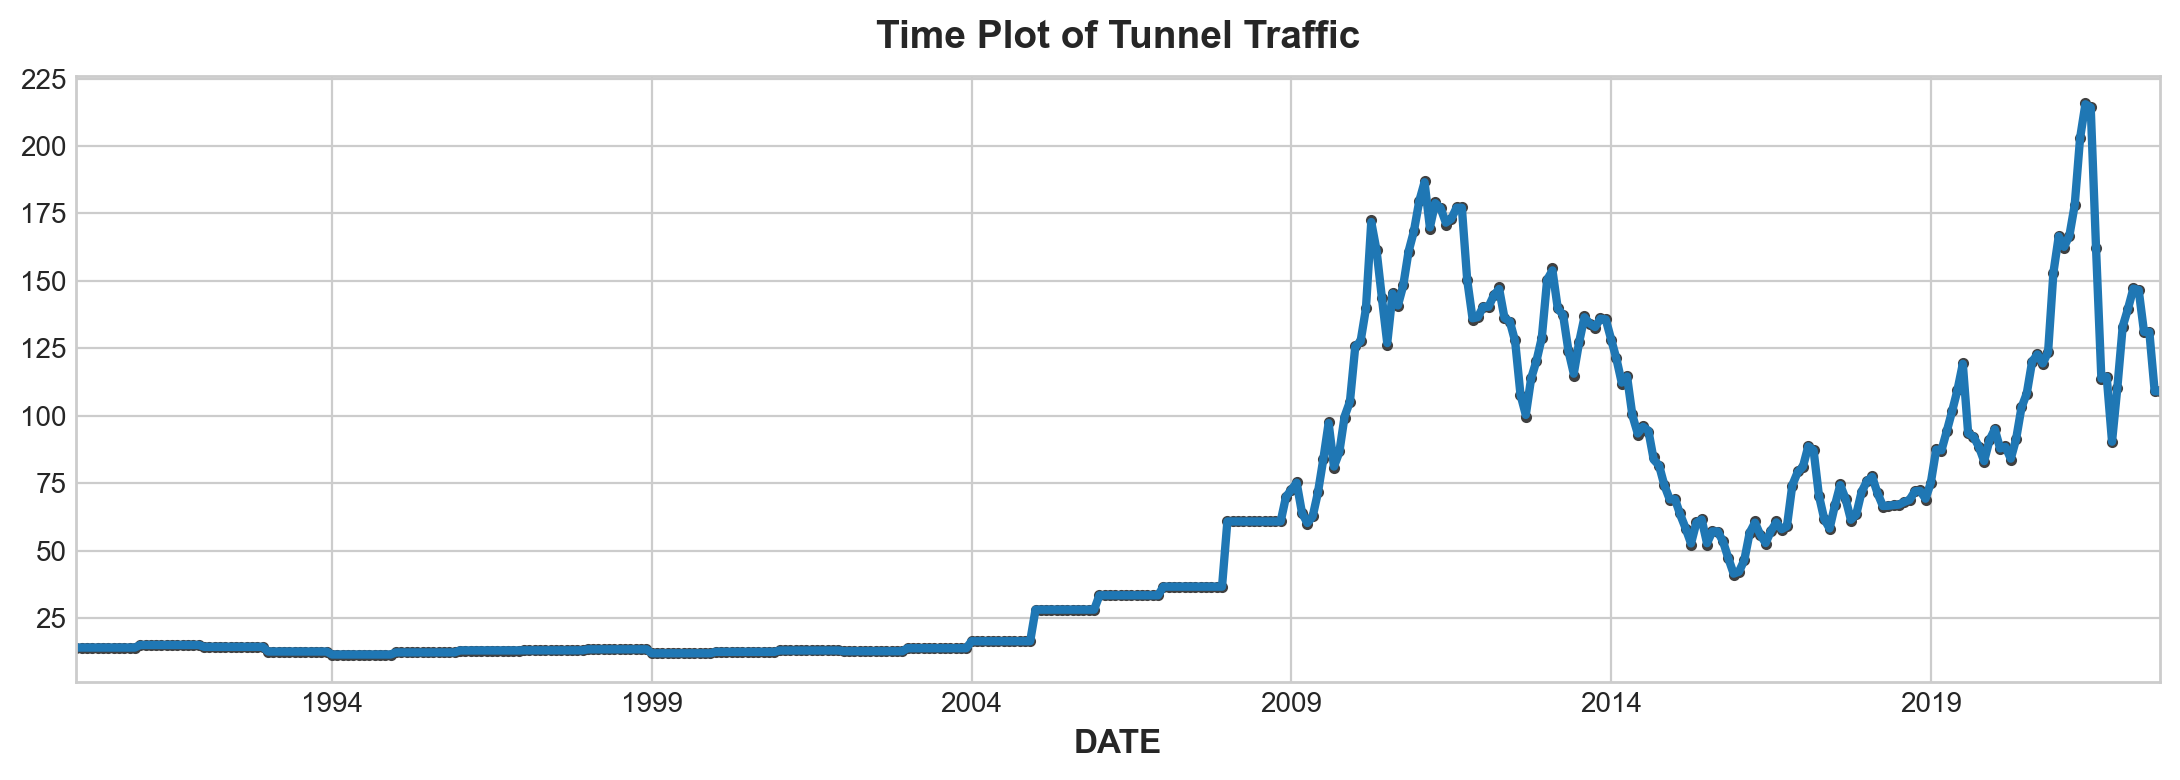

In [96]:
ax = y.plot(**plot_params)
ax = y_pred_xgb.plot(ax=ax, linewidth=3)

ax.set_title('Time Plot of Iron Ore Monthly Prices');

In [98]:
df['lag_1']= df['PIORECRUSDM'].shift(1)
df.head()

,PIORECRUSDM,TIME,Time,lag_1
DATE,,,,
1990-01-01,14.05,0,0,NaN
1990-02-01,14.05,1,1,14.05
1990-03-01,14.05,2,2,14.05
1990-04-01,14.05,3,3,14.05
1990-05-01,14.05,4,4,14.05


In [ ]:
from sklearn.